<a href="https://colab.research.google.com/github/hiu04/Attrition_Project/blob/main/Energy_consumption_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting and improving customer attrition - EDA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing all necessary libraries for the analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

## Cleaning and viewing the data

## Cleaning the data

In this section we will:


*   Upload the data
*   Segment the different variables
*   Get rid of empty records





In [ ]:
# Importing file
data = pd.read_csv(
    "/content/drive/MyDrive/Colab Notebooks/Attrition View.csv",
    delimiter=",")
data.head()



,CUSTOMER_ID,GENDER_ID,FIRST_NAME,LAST_NAME,PHONE_1,EMAIL,AGE,ENERGY_USAGE_PER_MONTH,ENERGY_EFFICIENCY,IS_REGISTERED_FOR_ALERTS,...,SEGMENT,EMPLOYMENT,STD_YRLY_USAGE_CUR_YEAR_MINUS_1,STD_YRLY_USAGE_CUR_YEAR_MINUS_2,STD_YRLY_USAGE_CUR_YEAR_MINUS_3,STD_YRLY_USAGE_CUR_YEAR_MINUS_4,STD_YRLY_USAGE_CUR_YEAR_MINUS_5,STD_YRLY_USAGE_CUR_YEAR_MINUS_6,STD_YRLY_USAGE_CUR_YEAR_MINUS_7,MEDIAN_YRLY_USAGE_CUR_YEAR_MINUS_1
0,1,2,Leonor,Cummerata,781-757-3537,Leonor.Cummerata@nola.biz,44,5080,0.390,1,...,PLATINUM,Employed full-time,56049,43703,26666,26666,28642,26666,22963,20500
1,2,1,Ima,Labadie,505-339-5197,Ima.Labadie@allie.tv,34,4970,0.356,0,...,GOLD,Employed full-time,52098,40740,26666,26666,26666,26666,21481,20500
2,3,1,Brycen,Hermiston,309-713-5431,Brycen.Hermiston@kristina.biz,39,9250,0.628,1,...,GOLD,Employed full-time,52098,40740,24691,24691,26666,24691,21481,20500
3,4,2,Nicolas,Baumbach,507-490-8532,Nicolas.Baumbach@amber.biz,37,4330,0.335,1,...,SILVER,Employed full-time,52098,40740,24691,24691,26666,24691,20000,20500
4,5,2,Deshawn,Ryan,409-899-6328,Deshawn.Ryan@kristoffer.us,54,9190,0.411,1,...,NaN,Employed full-time,48148,37777,24691,24691,24691,24691,20000,20500


In [ ]:
# Some indications about the DataFrame

print(data.shape)

index = data.index
columns = data.columns

print(index)
print(columns)

(65000, 41)
RangeIndex(start=0, stop=65000, step=1)
Index(['CUSTOMER_ID', 'GENDER_ID', 'FIRST_NAME', 'LAST_NAME', 'PHONE_1',
       'EMAIL', 'AGE', 'ENERGY_USAGE_PER_MONTH', 'ENERGY_EFFICIENCY',
       'IS_REGISTERED_FOR_ALERTS', 'OWNS_HOME', 'COMPLAINTS',
       'ATTRITION_STATUS', 'HAS_THERMOSTAT', 'HAS_HOME_AUTOMATION',
       'PV_ZONING', 'WIND_ZONING', 'SMART_METER_COMMENTS', 'IS_CAR_OWNER',
       'HAS_EV', 'HAS_PV', 'HAS_WIND', 'TENURE', 'EBILL', 'IN_WARRANTY',
       'CITY', 'CURRENT_OFFER', 'CURRENT_CONTRACT', 'CURRENT_ISSUE',
       'MARITAL_STATUS', 'EDUCATION', 'SEGMENT', 'EMPLOYMENT',
       'STD_YRLY_USAGE_CUR_YEAR_MINUS_1', 'STD_YRLY_USAGE_CUR_YEAR_MINUS_2',
       'STD_YRLY_USAGE_CUR_YEAR_MINUS_3', 'STD_YRLY_USAGE_CUR_YEAR_MINUS_4',
       'STD_YRLY_USAGE_CUR_YEAR_MINUS_5', 'STD_YRLY_USAGE_CUR_YEAR_MINUS_6',
       'STD_YRLY_USAGE_CUR_YEAR_MINUS_7',
       'MEDIAN_YRLY_USAGE_CUR_YEAR_MINUS_1'],
      dtype='object')


In [ ]:
# How many records do we have? Dropping missing values
## length of database
initial_database_length = len(data)

print(f"The database has initialy {initial_database_length} records")
## number of missing values per column

def missing_values_calculation(data):

  #We store the number of missing values for every column
  total = data.isnull().sum().sort_values(ascending=False)

  #We make a new column contaning the percentage of missing values
  #out of the total number of values
  percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)

  #We now make a DF containing these 2 values
  missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

  #And we print the DataFrame
  display(missing)

#We call the function
missing_values_calculation(data)


The database has initialy 65000 records


,Total,Percent
SEGMENT,11635,0.179
CURRENT_CONTRACT,6955,0.107
HAS_WIND,0,0.000
EBILL,0,0.000
IN_WARRANTY,0,0.000
CITY,0,0.000
CURRENT_OFFER,0,0.000
CURRENT_ISSUE,0,0.000
MARITAL_STATUS,0,0.000
EDUCATION,0,0.000


In [ ]:
## drop the missing values
data = data.dropna()

## new data length
print(f"Now the dataset has {len(data)} records")

Now the dataset has 51610 records


### Analysing types and classify variables

In [ ]:
# Types of columns
data.dtypes

CUSTOMER_ID                             int64
GENDER_ID                               int64
FIRST_NAME                             object
LAST_NAME                              object
PHONE_1                                object
EMAIL                                  object
AGE                                     int64
ENERGY_USAGE_PER_MONTH                  int64
ENERGY_EFFICIENCY                     float64
IS_REGISTERED_FOR_ALERTS                int64
OWNS_HOME                               int64
COMPLAINTS                              int64
ATTRITION_STATUS                        int64
HAS_THERMOSTAT                          int64
HAS_HOME_AUTOMATION                     int64
PV_ZONING                               int64
WIND_ZONING                             int64
SMART_METER_COMMENTS                   object
IS_CAR_OWNER                            int64
HAS_EV                                  int64
HAS_PV                                  int64
HAS_WIND                          

In [ ]:
# Dividing the Data Columns into categories for better treatment
## our variable of interest is "ATTRITION_STATUS" because we are building a model where we want to improve customer attrition

interest_var = 'ATTRITION_STATUS'

## some columns of the data are not interesting because they are too personnal and not relevant for the analysis but we will keep phone number for analysis purposes
notinteresting_var = ['FIRST_NAME', 'LAST_NAME','EMAIL']

### let's drop these variables

data = data.drop(columns=notinteresting_var)

## some columns contain numerial_data and others contain categorical data

numerical_var = ['AGE', 'ENERGY_EFFICIENCY',
                  'STD_YRLY_USAGE_CUR_YEAR_MINUS_1',
                  'STD_YRLY_USAGE_CUR_YEAR_MINUS_2',
                  'STD_YRLY_USAGE_CUR_YEAR_MINUS_3',
                  'STD_YRLY_USAGE_CUR_YEAR_MINUS_4',
                  'STD_YRLY_USAGE_CUR_YEAR_MINUS_5',
                  'STD_YRLY_USAGE_CUR_YEAR_MINUS_6',
                  'STD_YRLY_USAGE_CUR_YEAR_MINUS_7',
                  'MEDIAN_YRLY_USAGE_CUR_YEAR_MINUS_1',
                  'ENERGY_USAGE_PER_MONTH', 'TENURE']

dummy_var = ['GENDER_ID', 'IS_REGISTERED_FOR_ALERTS', 'OWNS_HOME', 'COMPLAINTS',
              'ATTRITION_STATUS','HAS_THERMOSTAT', 'HAS_HOME_AUTOMATION',
              'PV_ZONING','WIND_ZONING', 'IS_CAR_OWNER','HAS_EV', 'HAS_PV',
              'HAS_WIND','EBILL','IN_WARRANTY']



# Identifying categorical variables by excluding dummy, target and
# numerical variables
categorical_var = [column for column in data.columns # == "object"
                    if column not in (dummy_var + numerical_var + [interest_var] + ['PHONE_1'])]

In [ ]:
# Displaying numerical_var, categorial_var

data[numerical_var].head()

,AGE,ENERGY_EFFICIENCY,STD_YRLY_USAGE_CUR_YEAR_MINUS_1,STD_YRLY_USAGE_CUR_YEAR_MINUS_2,STD_YRLY_USAGE_CUR_YEAR_MINUS_3,STD_YRLY_USAGE_CUR_YEAR_MINUS_4,STD_YRLY_USAGE_CUR_YEAR_MINUS_5,STD_YRLY_USAGE_CUR_YEAR_MINUS_6,STD_YRLY_USAGE_CUR_YEAR_MINUS_7,MEDIAN_YRLY_USAGE_CUR_YEAR_MINUS_1,ENERGY_USAGE_PER_MONTH,TENURE
0,44,0.390,56049,43703,26666,26666,28642,26666,22963,20500,5080,13
1,34,0.356,52098,40740,26666,26666,26666,26666,21481,20500,4970,11
2,39,0.628,52098,40740,24691,24691,26666,24691,21481,20500,9250,68
3,37,0.335,52098,40740,24691,24691,26666,24691,20000,20500,4330,33
5,65,0.333,48148,37777,24691,24691,24691,24691,20000,20500,5200,41


In [ ]:
# Displaying categorical_var

data[categorical_var].head()

,CUSTOMER_ID,SMART_METER_COMMENTS,CITY,CURRENT_OFFER,CURRENT_CONTRACT,CURRENT_ISSUE,MARITAL_STATUS,EDUCATION,SEGMENT,EMPLOYMENT
0,1,Negative,Mountain View,Home Energy Audits,Time of Use,Replacement phone,S,Associate degree,PLATINUM,Employed full-time
1,2,Negative,Mountain View,Free Energy Audits,Dynamic Pricing 240 minute plan,Billing Issue,U,Bachelor's degree,GOLD,Employed full-time
2,3,Neutral,Sunnyvale,Home Energy Audits,Time of Use,Billing Issue,U,Bachelor's degree or more,GOLD,Employed full-time
3,4,Positive,Santa Clara,Rooftop Solar,Time of Use,Billing Issue,M,Bachelor's degree or more,SILVER,Employed full-time
5,6,Neutral,Santa Clara,Home Energy Audits,Time of Use,Replacement phone,S,Doctoral degree,GOLD,Employed full-time


As we can see in Data Frame "categorical_var", the variables are not always binary (0 or 1) but sometimes they have more than two categories.

For later purposes, we will create a list of the different categories for each variable.

In [ ]:
categories = {}

for rows in data[categorical_var]:
  if rows != 'PHONE_1':
    categories['cat_'+rows] = data[categorical_var][rows].unique()

for column, cats in categories.items():
  print(f"{column} : {cats}")

cat_CUSTOMER_ID : [    1     2     3 ... 64997 64998 64999]
cat_SMART_METER_COMMENTS : ['Negative' 'Neutral' 'Positive']
cat_CITY : ['Mountain View' 'Sunnyvale' 'Santa Clara' 'Palo Alto' 'Cupertino']
cat_CURRENT_OFFER : ['Home Energy Audits' 'Free Energy Audits' 'Rooftop Solar'
 'Small Scale Wind' 'Customer Rebates' 'Integrated Solar' 'Other'
 'Demand Response Program' 'New Construction Incentives']
cat_CURRENT_CONTRACT : ['Time of Use' 'Dynamic Pricing 240 minute plan']
cat_CURRENT_ISSUE : ['Replacement phone' 'Billing Issue' 'Best friend cancels' 'Drop Calls'
 'Power Outage' 'Low Voltage' 'Equipment failure' 'GPRS Issue'
 'Network Issue']
cat_MARITAL_STATUS : ['S' 'U' 'M']
cat_EDUCATION : ['Associate degree' "Bachelor's degree" "Bachelor's degree or more"
 'Doctoral degree' 'High school graduate' 'Some high school'
 'Some college' 'Less than 9th grade' "Master's degree"]
cat_SEGMENT : ['PLATINUM' 'GOLD' 'SILVER']
cat_EMPLOYMENT : ['Employed full-time' 'Employed part-time' 'Retired'
 

## Viewing the data

### Insight of our variable of interest

Text(0.5, 1.0, 'Attrition distribution')

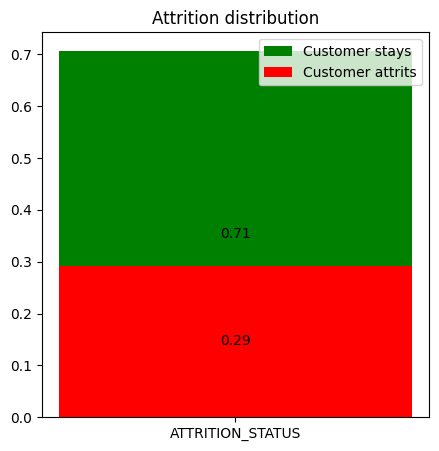

In [ ]:
interest_var_values = data[interest_var].value_counts().reset_index()

interest_var_values['Percentage'] = interest_var_values['ATTRITION_STATUS']/interest_var_values['ATTRITION_STATUS'].sum()

interest_var_0 = interest_var_values[interest_var_values['index']==0]
interest_var_1 = interest_var_values[interest_var_values['index']==1]

interest_var_values

figure1, x = plt.subplots(figsize=(5,5))

bar0 = x.bar(interest_var, interest_var_0['Percentage'], label=interest_var_0, color='green')
bar1 = x.bar(interest_var, interest_var_1['Percentage'], label=interest_var_1, color='red')
x.bar_label(bar0, fmt='%.2f', label_type='center')
x.bar_label(bar1, fmt='%.2f', label_type='center')

plt.legend(['Customer stays','Customer attrits'])
plt.title('Attrition distribution')

### Ploting Energy usage

<ipython-input-118-3f1dfbbce206>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['ENERGY_USAGE_PER_MONTH'])


<Axes: xlabel='ENERGY_USAGE_PER_MONTH', ylabel='Density'>

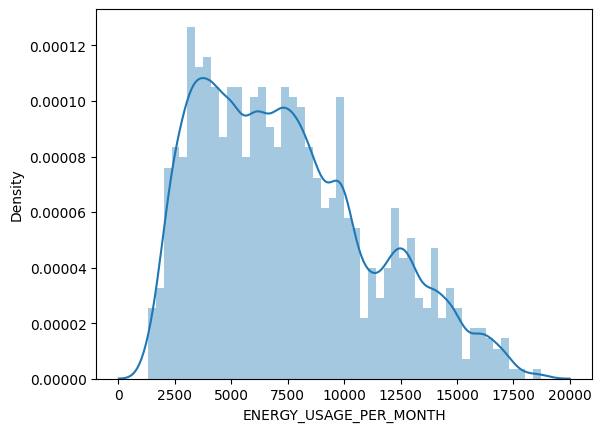

In [ ]:
sns.distplot(data['ENERGY_USAGE_PER_MONTH'])


<ipython-input-119-69c3f1a52d58>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['STD_YRLY_USAGE_CUR_YEAR_MINUS_1'])


<Axes: xlabel='STD_YRLY_USAGE_CUR_YEAR_MINUS_1', ylabel='Density'>

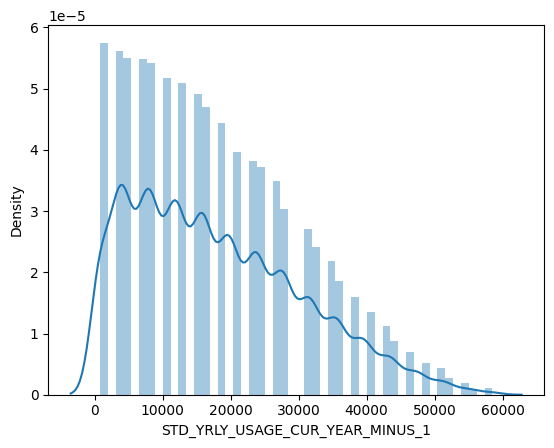

In [ ]:
sns.distplot(data['STD_YRLY_USAGE_CUR_YEAR_MINUS_1'])


In [ ]:
# it looks like there is some regularity in the data, let's extract the different clusters of consumption

dfs = pd.DataFrame({"Number of clusters":[]}, index=[])

def cluster_extract(features):
  for feature in features:
    liste= []
    df0 = data[feature]
    for i in df0.unique():
      liste.append(i)

    dfs.loc[feature] = [len(liste)]

cluster_extract(['ENERGY_USAGE_PER_MONTH','STD_YRLY_USAGE_CUR_YEAR_MINUS_1',
                  'STD_YRLY_USAGE_CUR_YEAR_MINUS_2',
                  'STD_YRLY_USAGE_CUR_YEAR_MINUS_3',
                  'STD_YRLY_USAGE_CUR_YEAR_MINUS_4',
                  'STD_YRLY_USAGE_CUR_YEAR_MINUS_5',
                  'STD_YRLY_USAGE_CUR_YEAR_MINUS_6',
                  'STD_YRLY_USAGE_CUR_YEAR_MINUS_7',
                  'MEDIAN_YRLY_USAGE_CUR_YEAR_MINUS_1'])

dfs

,Number of clusters
ENERGY_USAGE_PER_MONTH,507
STD_YRLY_USAGE_CUR_YEAR_MINUS_1,30
STD_YRLY_USAGE_CUR_YEAR_MINUS_2,31
STD_YRLY_USAGE_CUR_YEAR_MINUS_3,15
STD_YRLY_USAGE_CUR_YEAR_MINUS_4,15
STD_YRLY_USAGE_CUR_YEAR_MINUS_5,15
STD_YRLY_USAGE_CUR_YEAR_MINUS_6,15
STD_YRLY_USAGE_CUR_YEAR_MINUS_7,16
MEDIAN_YRLY_USAGE_CUR_YEAR_MINUS_1,3


Our dataset presentes different types of consumers. We can see for exemple that for year minus 1, there are 30 different type of customers according to their consumption.

With that we can try to determine a more precise customer profile in order to study their consumption (which is our sales) and their attrition rate (that we want to keep low).

# What predicts attrition rate?

From last analysis we have:

In [ ]:
#Analysing differences in attrition rate
dfs = pd.DataFrame({
    "Attrition rate if 0": [],
    "Attrition rate if 1": []
}, index=[])

def mean_extract(features):
  for feature in features:
    df1 = data[data[feature]==1]
    df0 = data[data[feature]==0]

    dfs.loc[feature] = [df0['ATTRITION_STATUS'].mean(),df1['ATTRITION_STATUS'].mean()]

mean_extract(dummy_var)

dfs

,Attrition rate if 0,Attrition rate if 1
GENDER_ID,NaN,0.318492
IS_REGISTERED_FOR_ALERTS,0.295737,0.290642
OWNS_HOME,0.273124,0.297736
COMPLAINTS,0.268899,0.341350
ATTRITION_STATUS,0.000000,1.000000
HAS_THERMOSTAT,0.308907,0.280463
HAS_HOME_AUTOMATION,0.279632,0.300702
PV_ZONING,0.288434,0.297644
WIND_ZONING,0.284198,0.300813
IS_CAR_OWNER,0.287724,0.295618


Let's study the differences and see which are important

In [ ]:
# sex = feature and survive = attrition status
import scipy.stats.distributions as dist

def hypothesis_test(features):

  variance = []
  standard_error = []
  count = 0
  best_estimate = []
  test_stat = []
  hypothesized_estimate = 0
  significant_variables = []

  for feature in features:
    contingency_table = pd.crosstab(data[features]['ATTRITION_STATUS'],data[feature]).apply(lambda r:r/r.sum(),axis=0)

    mean_attrition_rate = (data['ATTRITION_STATUS'] == 1).mean()

    prop = data[features].groupby(feature)["ATTRITION_STATUS"].agg([lambda z:np.mean(z==1),"size"])
    prop.columns = ['proportions_attrits','total_counts']

    #Calculate variance and standard error
    variance.append(mean_attrition_rate * (1-mean_attrition_rate))
    standard_error.append(np.sqrt(variance[count] * ((1 / prop['total_counts'].tolist()[0]) + (1 / prop['total_counts'].tolist()[1]))))

    # Calculate the test statistic

    best_estimate.append(prop.proportions_attrits.tolist()[1] - prop.proportions_attrits.tolist()[0])
    test_stat.append((best_estimate[count]-hypothesized_estimate) / standard_error[count])

    # Calculate the  p-value
    pvalue = 2*dist.norm.cdf(-np.abs(test_stat[count])) # Multiplied by two indicates a two tailed testing.

    # Print result

    print(f"{feature}:\n"
    f"The best estimate is {best_estimate[count]}\n"
    f"Computed Test Statistic is {test_stat[count]}\n")
    f"Computed P-value is {pvalue}\n"

    if pvalue < 0.01 :
      print(f"Computed P-value is {pvalue}***\n")
      significant_variables.append(feature)

    else :
      if pvalue > 0.01 and pvalue < 0.05:
        f"Computed P-value is {pvalue}**\n"

      else :
        if pvalue > 0.05 and pvalue < 0.1:
          f"Computed P-value is {pvalue}*\n"

        else:
          f"Computed P-value is {pvalue}\n"

    count = count+1

  return significant_variables

list_sig_vars = hypothesis_test(dummy_var)

print(list_sig_vars)

GENDER_ID:
The best estimate is -0.04160029654295522
Computed Test Statistic is -10.08345447048024

Computed P-value is 6.5386036513159005e-24***

IS_REGISTERED_FOR_ALERTS:
The best estimate is -0.005095238023005155
Computed Test Statistic is -1.2496922711267335

OWNS_HOME:
The best estimate is 0.024611718177119046
Computed Test Statistic is 4.952048303118716

Computed P-value is 7.34363690904371e-07***

COMPLAINTS:
The best estimate is 0.0724510069014177
Computed Test Statistic is 16.992417735802135

Computed P-value is 9.345625741358667e-65***

ATTRITION_STATUS:
The best estimate is 1.0
Computed Test Statistic is 227.17834403833479

Computed P-value is 0.0***

HAS_THERMOSTAT:
The best estimate is -0.028443982659166644
Computed Test Statistic is -7.032335273806337

Computed P-value is 2.0310502863900812e-12***

HAS_HOME_AUTOMATION:
The best estimate is 0.021070141707907608
Computed Test Statistic is 5.103887067337632

Computed P-value is 3.3274689143117774e-07***

PV_ZONING:
The best 

In [ ]:
len(list_sig_vars)<=len(dummy_var)

True

# Which variables benefit energy consumption?

Now that we have the variables which differ significantly between states on attrition status, we need to understand which of these are significantly in consumption.

In [ ]:
# Display the DB

data.head()

,CUSTOMER_ID,GENDER_ID,PHONE_1,AGE,ENERGY_USAGE_PER_MONTH,ENERGY_EFFICIENCY,IS_REGISTERED_FOR_ALERTS,OWNS_HOME,COMPLAINTS,ATTRITION_STATUS,...,SEGMENT,EMPLOYMENT,STD_YRLY_USAGE_CUR_YEAR_MINUS_1,STD_YRLY_USAGE_CUR_YEAR_MINUS_2,STD_YRLY_USAGE_CUR_YEAR_MINUS_3,STD_YRLY_USAGE_CUR_YEAR_MINUS_4,STD_YRLY_USAGE_CUR_YEAR_MINUS_5,STD_YRLY_USAGE_CUR_YEAR_MINUS_6,STD_YRLY_USAGE_CUR_YEAR_MINUS_7,MEDIAN_YRLY_USAGE_CUR_YEAR_MINUS_1
0,1,2,781-757-3537,44,5080,0.390,1,1,0,0,...,PLATINUM,Employed full-time,56049,43703,26666,26666,28642,26666,22963,20500
1,2,1,505-339-5197,34,4970,0.356,0,1,1,1,...,GOLD,Employed full-time,52098,40740,26666,26666,26666,26666,21481,20500
2,3,1,309-713-5431,39,9250,0.628,1,1,0,0,...,GOLD,Employed full-time,52098,40740,24691,24691,26666,24691,21481,20500
3,4,2,507-490-8532,37,4330,0.335,1,1,0,1,...,SILVER,Employed full-time,52098,40740,24691,24691,26666,24691,20000,20500
5,6,2,502-232-9407,65,5200,0.333,1,0,0,1,...,GOLD,Employed full-time,48148,37777,24691,24691,24691,24691,20000,20500


In [ ]:
# Create a df with the consumtion values

df_cons = data[['STD_YRLY_USAGE_CUR_YEAR_MINUS_1','STD_YRLY_USAGE_CUR_YEAR_MINUS_2','STD_YRLY_USAGE_CUR_YEAR_MINUS_3','STD_YRLY_USAGE_CUR_YEAR_MINUS_4','STD_YRLY_USAGE_CUR_YEAR_MINUS_5','STD_YRLY_USAGE_CUR_YEAR_MINUS_6','STD_YRLY_USAGE_CUR_YEAR_MINUS_7']]

df_delta = pd.DataFrame()
df_delta['delta_minus_7'] = np.zeros(len(data['STD_YRLY_USAGE_CUR_YEAR_MINUS_7']))
df_delta['delta_minus_6'] = (df_cons['STD_YRLY_USAGE_CUR_YEAR_MINUS_6']-df_cons['STD_YRLY_USAGE_CUR_YEAR_MINUS_7'])/df_cons['STD_YRLY_USAGE_CUR_YEAR_MINUS_7']
df_delta['delta_minus_6'].fillna(0, inplace=True)

df_delta['delta_minus_5'] = (df_cons['STD_YRLY_USAGE_CUR_YEAR_MINUS_5']-df_cons['STD_YRLY_USAGE_CUR_YEAR_MINUS_6'])/df_cons['STD_YRLY_USAGE_CUR_YEAR_MINUS_6']
df_delta['delta_minus_5'].fillna(0, inplace=True)

df_delta['delta_minus_4'] = (df_cons['STD_YRLY_USAGE_CUR_YEAR_MINUS_4']-df_cons['STD_YRLY_USAGE_CUR_YEAR_MINUS_5'])/df_cons['STD_YRLY_USAGE_CUR_YEAR_MINUS_5']
df_delta['delta_minus_4'].fillna(0, inplace=True)

df_delta['delta_minus_3'] = (df_cons['STD_YRLY_USAGE_CUR_YEAR_MINUS_3']-df_cons['STD_YRLY_USAGE_CUR_YEAR_MINUS_4'])/df_cons['STD_YRLY_USAGE_CUR_YEAR_MINUS_4']
df_delta['delta_minus_3'].fillna(0, inplace=True)

df_delta['delta_minus_2'] = (df_cons['STD_YRLY_USAGE_CUR_YEAR_MINUS_2']-df_cons['STD_YRLY_USAGE_CUR_YEAR_MINUS_3'])/df_cons['STD_YRLY_USAGE_CUR_YEAR_MINUS_3']
df_delta['delta_minus_2'].fillna(0, inplace=True)

df_delta['delta_minus_1'] = (df_cons['STD_YRLY_USAGE_CUR_YEAR_MINUS_1']-df_cons['STD_YRLY_USAGE_CUR_YEAR_MINUS_2'])/df_cons['STD_YRLY_USAGE_CUR_YEAR_MINUS_2']
df_delta['delta_minus_1'].fillna(0, inplace=True)

df_delta['mean'] = (df_delta['delta_minus_1'] +df_delta['delta_minus_2']+df_delta['delta_minus_3']+df_delta['delta_minus_4']+df_delta['delta_minus_5']+df_delta['delta_minus_6']+df_delta['delta_minus_7'])/7

df_delta

,delta_minus_7,delta_minus_6,delta_minus_5,delta_minus_4,delta_minus_3,delta_minus_2,delta_minus_1,mean
0,0.0,0.161259,0.074102,-0.068990,0.0,0.638903,0.282498,0.155396
1,0.0,0.241376,0.000000,0.000000,0.0,0.527788,0.278792,0.149708
2,0.0,0.149434,0.079989,-0.074064,0.0,0.649994,0.278792,0.154878
3,0.0,0.234550,0.079989,-0.074064,0.0,0.649994,0.278792,0.167037
4,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
51605,0.0,0.090820,0.222322,0.000000,0.0,0.431793,0.222244,0.138168
51606,0.0,0.333333,0.000000,0.000000,0.0,0.431793,0.222244,0.141053
51607,0.0,0.333333,0.000000,0.000000,0.0,0.431793,0.222244,0.141053
51608,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


In [ ]:
df_delta.isna().sum()

delta_minus_7    0
delta_minus_6    0
delta_minus_5    0
delta_minus_4    0
delta_minus_3    0
delta_minus_2    0
delta_minus_1    0
mean             0
dtype: int64